#CIFAR-10 Dataset PyTorch implementation

## Load srouce code files from git

In [1]:
import os, sys, importlib

user = "Paurnima-Chavan"
repo = "cifar-s10"
src_dir = "src"

if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://github.com/{user}/{repo}.git

path = f"{repo}/{src_dir}"
if not path in sys.path:
    sys.path.insert(1, path)

Cloning into 'cifar-s10'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), 6.97 KiB | 1.74 MiB/s, done.


In [2]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from utils import plot_dataset_images, plot_train_test_accuracy_loss
from dataset import load_cifar10_data
from model import Net, model_summary
from train import train, reset_train_loss, get_train_loss_acc
from test import test, reset_test_loss, get_test_loss_acc

## Load CIFAR10 Dataset

In [3]:
batch_size = 512
train_loader , test_loader = load_cifar10_data(batch_size=batch_size)

100%|██████████| 170498071/170498071 [00:13<00:00, 13065197.10it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


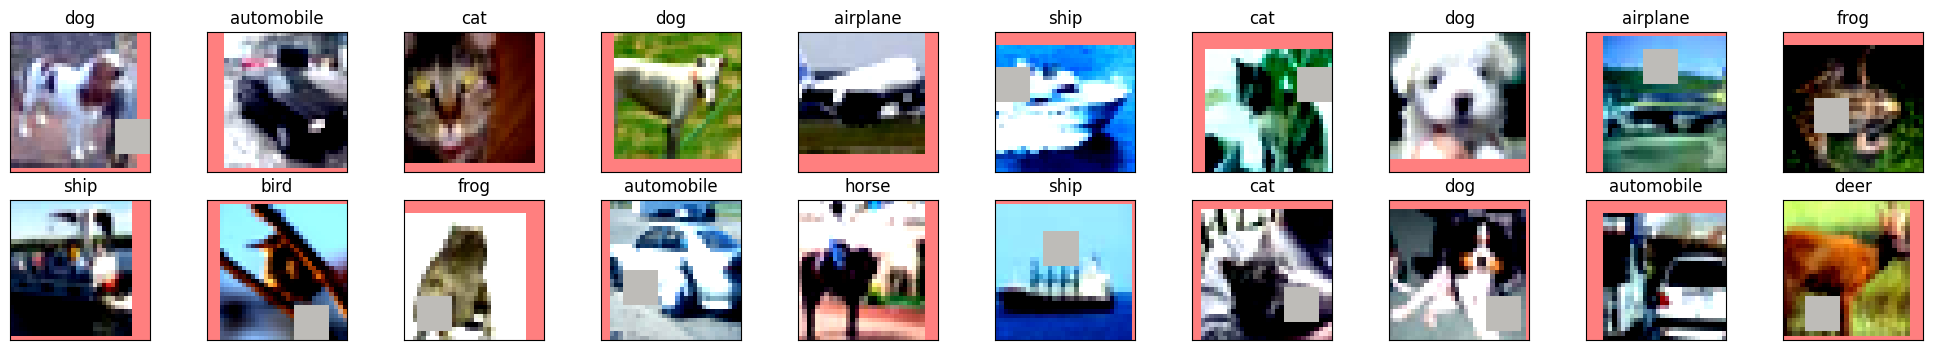

In [4]:
plot_dataset_images(train_loader, 20)

## Load the model

In [5]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)


device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


In [6]:
model = Net().to(device)
model_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

## One Cycle Policy

In [7]:
!pip install torch-lr-finder

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.64E-02


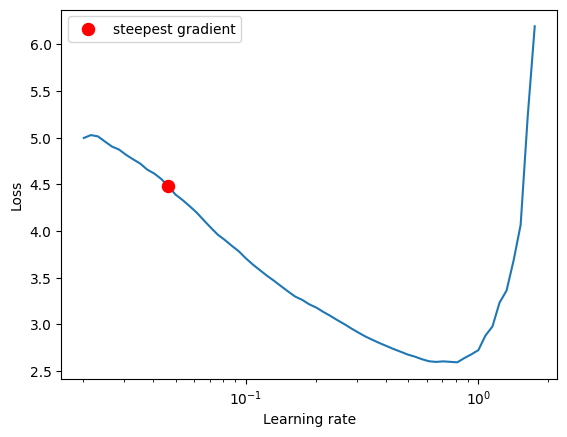

In [44]:
from torch_lr_finder import LRFinder
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

model =  Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=10, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect loss-learning rate graph
lr_finder.reset() # to reset the model amd optimizer to their initial state

In [45]:
from torch.optim.lr_scheduler import OneCycleLR
EPOCHS = 24
reset_train_loss()
reset_test_loss()

In [46]:
scheduler = OneCycleLR(
    optimizer,
    max_lr= 4.64E-02 ,
    steps_per_epoch=len(train_loader),
    epochs=EPOCHS,
    pct_start=3/EPOCHS,
    div_factor=100,
    three_phase=False,
    final_div_factor=100,
    anneal_strategy='linear')

for epoch in  range(1, EPOCHS +1):
  print(f"Ephoch {epoch}")
  train(model, device, train_loader, optimizer, epoch, scheduler, criterion)
  test(model, device, test_loader, criterion)


Ephoch 1


Loss=1.2421714067459106 Batch_id=97 Accuracy=47.27: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]



Test set: Average loss: 0.0034, Accuracy: 4861/10000 (48.61%)

Ephoch 2


Loss=0.80267733335495 Batch_id=97 Accuracy=62.45: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]



Test set: Average loss: 0.0028, Accuracy: 5657/10000 (56.57%)

Ephoch 3


Loss=0.8705435991287231 Batch_id=97 Accuracy=70.73: 100%|██████████| 98/98 [00:24<00:00,  4.03it/s]



Test set: Average loss: 0.0046, Accuracy: 4698/10000 (46.98%)

Ephoch 4


Loss=0.7214486002922058 Batch_id=97 Accuracy=74.93: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]



Test set: Average loss: 0.0026, Accuracy: 5928/10000 (59.28%)

Ephoch 5


Loss=0.7496989369392395 Batch_id=97 Accuracy=76.35: 100%|██████████| 98/98 [00:24<00:00,  3.94it/s]



Test set: Average loss: 0.0016, Accuracy: 7300/10000 (73.00%)

Ephoch 6


Loss=0.6234063506126404 Batch_id=97 Accuracy=77.30: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]



Test set: Average loss: 0.0017, Accuracy: 7078/10000 (70.78%)

Ephoch 7


Loss=0.6622894406318665 Batch_id=97 Accuracy=77.68: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]



Test set: Average loss: 0.0025, Accuracy: 6110/10000 (61.10%)

Ephoch 8


Loss=0.5269669890403748 Batch_id=97 Accuracy=78.54: 100%|██████████| 98/98 [00:24<00:00,  3.96it/s]



Test set: Average loss: 0.0022, Accuracy: 6596/10000 (65.96%)

Ephoch 9


Loss=0.5765413641929626 Batch_id=97 Accuracy=78.83: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]



Test set: Average loss: 0.0018, Accuracy: 7132/10000 (71.32%)

Ephoch 10


Loss=0.5619004368782043 Batch_id=97 Accuracy=79.16: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]



Test set: Average loss: 0.0017, Accuracy: 7148/10000 (71.48%)

Ephoch 11


Loss=0.6174190640449524 Batch_id=97 Accuracy=79.82: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 0.0019, Accuracy: 6743/10000 (67.43%)

Ephoch 12


Loss=0.6491837501525879 Batch_id=97 Accuracy=79.70: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 0.0012, Accuracy: 7871/10000 (78.71%)

Ephoch 13


Loss=0.46538493037223816 Batch_id=97 Accuracy=80.47: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 0.0014, Accuracy: 7627/10000 (76.27%)

Ephoch 14


Loss=0.5024491548538208 Batch_id=97 Accuracy=81.25: 100%|██████████| 98/98 [00:24<00:00,  4.03it/s]



Test set: Average loss: 0.0012, Accuracy: 7966/10000 (79.66%)

Ephoch 15


Loss=0.5650359988212585 Batch_id=97 Accuracy=81.63: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]



Test set: Average loss: 0.0013, Accuracy: 7736/10000 (77.36%)

Ephoch 16


Loss=0.4369974732398987 Batch_id=97 Accuracy=82.38: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 0.0011, Accuracy: 8128/10000 (81.28%)

Ephoch 17


Loss=0.4452185034751892 Batch_id=97 Accuracy=82.98: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 0.0013, Accuracy: 7974/10000 (79.74%)

Ephoch 18


Loss=0.436404287815094 Batch_id=97 Accuracy=84.31: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 0.0011, Accuracy: 8114/10000 (81.14%)

Ephoch 19


Loss=0.463662326335907 Batch_id=97 Accuracy=84.85: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 0.0011, Accuracy: 8112/10000 (81.12%)

Ephoch 20


Loss=0.4203866422176361 Batch_id=97 Accuracy=85.87: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]



Test set: Average loss: 0.0009, Accuracy: 8417/10000 (84.17%)

Ephoch 21


Loss=0.342346727848053 Batch_id=97 Accuracy=87.25: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]



Test set: Average loss: 0.0008, Accuracy: 8675/10000 (86.75%)

Ephoch 22


Loss=0.2727169692516327 Batch_id=97 Accuracy=88.77: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 0.0008, Accuracy: 8564/10000 (85.64%)

Ephoch 23


Loss=0.20455989241600037 Batch_id=97 Accuracy=90.55: 100%|██████████| 98/98 [00:24<00:00,  4.03it/s]



Test set: Average loss: 0.0006, Accuracy: 8898/10000 (88.98%)

Ephoch 24


Loss=0.21711549162864685 Batch_id=97 Accuracy=92.53: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 0.0006, Accuracy: 9022/10000 (90.22%)

